In [1]:
%cd ../tti-explorer
%pip install -q .

/home/gejinchen/Desktop/l48/project/tti-explorer
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tti
from tti import simulation

import GPy
import GPyOpt
from numpy.random import seed
import matplotlib

import numpy as np

# Use parameters in config as cost

In [3]:
# The base function that reuturns R
def f(x):
    # x has shape (1, 2)
    theta = x[0]
    config_details = {0 : {"name": "compliance", "config": "policy_config"}, 
                      1 : {"name": "go_to_school_prob", "config": "policy_config"}} 
    output_dict = simulation(theta, config_details)
    reduced_r = output_dict['Effective R']
    return reduced_r

In [4]:
def cost(x):
    compliance = x[0,0]
    go_to_school_prob = x[0,1]
    
    # Use x**2 means the hgiher the compliance, the harder to increase compliance
    compliance_cost = compliance**2
    # Use 1/x means the lower the go_to_school_prob, the harder to decrease go_to_school_prob.(Maybe not true)
    # Plus 0.001 to avoid division by 0
    go_to_school_prob_cost = 1 / (go_to_school_prob+0.001)
    
    # Weighted by coefficients
    return compliance_cost + 0.05*go_to_school_prob_cost

In [5]:
def composite_f(x):
    coeff = 1.5
    return f(x) + coeff*cost(x)

In [6]:
bounds =[{'name': 'var_1', 'type': 'continuous', 'domain': (0, 1)},
         {'name': 'var_2', 'type': 'continuous', 'domain': (0, 1)}]

# Inequality constraint. The constraint is cost() < 1.0
constraints = [{'name': 'constr_1', 'constraint': 'x[:,0]**2 + 0.05*1/(x[:,1]+0.001) - 1.0'}]

# "Equality" constraint built with two inequality constraints. The constraints are cost() < 1.0 + 0.001 and cost() > 1.0 - 0.001
# constraints = [{'name': 'constr_1', 'constraint': 'x[:,0]**2 + 0.05*1/(x[:,1]+0.001) - 1.0 - 0.001'},
#                {'name': 'constr_2', 'constraint': '-x[:,0]**2 - 0.05*1/(x[:,1]+0.001) + 1.0 - 0.001'}]

# Do optimization

In [7]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(42)
myBopt2D = GPyOpt.methods.BayesianOptimization(f,
                                              domain=bounds,
                                              constraints=constraints,
                                              model_type = 'GP',
                                              acquisition_type='EI',  
                                              normalize_Y = True,
                                              acquisition_weight = 2)    

In [8]:
max_iter = 80  # maximum time 40 iterations
max_time = 240  # maximum time 120 seconds

myBopt2D.run_optimization(max_iter, max_time, verbosity=True, eps=1e-06)    


num acquisition: 1, time elapsed: 4.07s



num acquisition: 2, time elapsed: 8.83s



num acquisition: 3, time elapsed: 13.14s



num acquisition: 4, time elapsed: 17.37s



num acquisition: 5, time elapsed: 21.76s



num acquisition: 6, time elapsed: 26.37s



num acquisition: 7, time elapsed: 30.66s



num acquisition: 8, time elapsed: 34.93s



num acquisition: 9, time elapsed: 39.31s



num acquisition: 10, time elapsed: 43.62s



num acquisition: 11, time elapsed: 47.81s



num acquisition: 12, time elapsed: 52.23s



num acquisition: 13, time elapsed: 56.45s



num acquisition: 14, time elapsed: 60.64s



num acquisition: 15, time elapsed: 65.01s



num acquisition: 16, time elapsed: 69.28s



num acquisition: 17, time elapsed: 73.56s



num acquisition: 18, time elapsed: 77.85s



num acquisition: 19, time elapsed: 82.26s



num acquisition: 20, time elapsed: 86.28s



num acquisition: 21, time elapsed: 90.45s



num acquisition: 22, time elapsed: 94.59s



num acquisition: 23, time elapsed: 98.73s



num acquisition: 24, time elapsed: 102.65s



num acquisition: 25, time elapsed: 106.99s



num acquisition: 26, time elapsed: 111.27s



num acquisition: 27, time elapsed: 115.66s



num acquisition: 28, time elapsed: 119.96s



num acquisition: 29, time elapsed: 124.33s



num acquisition: 30, time elapsed: 128.48s



num acquisition: 31, time elapsed: 132.60s



num acquisition: 32, time elapsed: 136.78s



num acquisition: 33, time elapsed: 140.95s



num acquisition: 34, time elapsed: 145.05s



num acquisition: 35, time elapsed: 149.48s



num acquisition: 36, time elapsed: 153.88s



num acquisition: 37, time elapsed: 158.48s



num acquisition: 38, time elapsed: 162.66s



num acquisition: 39, time elapsed: 167.08s



num acquisition: 40, time elapsed: 171.12s



num acquisition: 41, time elapsed: 175.30s



num acquisition: 42, time elapsed: 179.55s



num acquisition: 43, time elapsed: 183.89s



num acquisition: 44, time elapsed: 188.08s



num acquisition: 45, time elapsed: 192.52s



num acquisition: 46, time elapsed: 196.83s



num acquisition: 47, time elapsed: 201.08s



num acquisition: 48, time elapsed: 205.40s



num acquisition: 49, time elapsed: 209.55s



num acquisition: 50, time elapsed: 213.73s



num acquisition: 51, time elapsed: 218.11s



num acquisition: 52, time elapsed: 222.70s



num acquisition: 53, time elapsed: 227.47s



num acquisition: 54, time elapsed: 233.00s



num acquisition: 55, time elapsed: 237.90s



num acquisition: 56, time elapsed: 242.86s


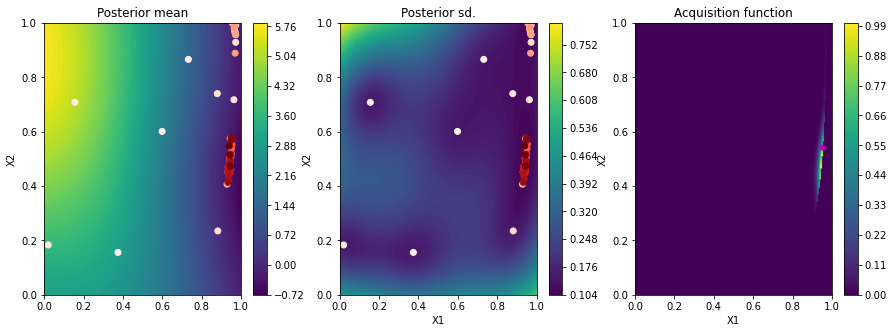

In [9]:
myBopt2D.plot_acquisition()

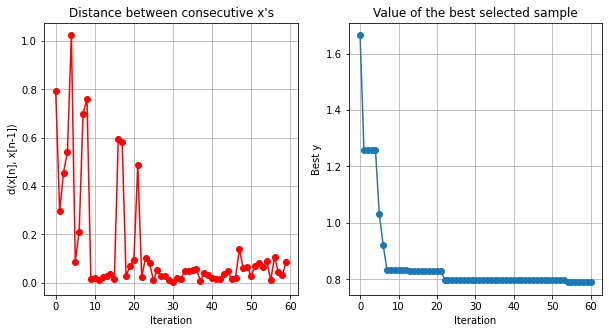

In [10]:
myBopt2D.plot_convergence()

In [11]:
# Optimum of x or argmin
myBopt2D.x_opt

array([0.94403036, 0.47815126])

In [12]:
# Optimum of fx or min
myBopt2D.fx_opt

0.7890806917792126

In [13]:
# Optima of R and cost respectively
x_opt = np.expand_dims(myBopt2D.x_opt, axis=0)
print ("R: ", f(x_opt))
print ("cost: ", cost(x_opt))


R:  0.7890806917792126
cost:  0.9955444980574566
